![Astrofisica Computacional](../logo.PNG)

---
## 27. Análisis de Errores


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se presentan algunos conceptos fundamentales del análisis de errores y de la estabilidad.

---

Varias fuentes de error aparecen en los calculos numéricos. Algunas de ellas son:

**Incertidumbre experimental** : Los datos experimentales están limitados por la precisión de los aparatos de medida. Por lo tanto es usual representar las cantidades experimentales con el formato $x \pm \Delta x$ donde $\Delta x$ corresponde a la incertidumbre en las mediciones.\
Cuando se utilizan cantidades o datos experimentales en algoritmos numéricos, las incertidumbres pueden llevar a errores finales grandes.

**Errores de Redondeo (Números de Punto Flotante)** : La representación computacional de un número esta siempre limitado por la memoria adjudicada a su representación. Por lo tanto, es inherente un error de redondeo en cualquier cantidad almacendad en un ordenador y este hecho puede llevar a una acumulación que finalmente desemboca en un error grande si no se controla por el algoritmo. 

**Errores de Truncamiento** : Cuando se representa una función en el computador, como por ejemplo una raiz cuadrada, una exponencial, un logaritmo, etc., When we represent some functions such as suare roots, exponentials, logarithms, trigonometric funtionutilizando expansiones en serie, el truncamiento de la serie o las iteraciones del algoritmo induce un error que puede acumularse en cada paso.

A continuación ilustraremos la existencia de estas fuentes de error con algunos ejemplos concretos.

---
### Errores de Redondeo (Números de Punto Flotante)

Primero, definiremos un número de punto flotante,

In [1]:
x = 3.1416
x

3.1416

Si se muestra en pantalla este número, con una precisión de 20 cifras decimales, se puede observar un error inducido por la representación que realiza el computador. Este error es inherente al número finito de bits que se utilizan para guardar el número de punto flotante.

In [2]:
print(f'{x:.20f}')

3.14159999999999994813


De esta forma, sumar un número pequeño a $x$ da como resultado algo inesperado: 

In [3]:
y=x+0.0000000000000001
print(f'{y:.20f}')

3.14159999999999994813


#### Epsilon de la Máquina 

La cantidad denominada **épsilon de la máquina** corresponde al valor mínimo $\epsilon$ para el cual la máquina asume que  $1. + \epsilon= 1$. Matemáticamente lo definimos diciendo que 

$\epsilon = \min \left[ \delta >0 |: 1 +\delta >1 \right]  $

Esta cantidad define la precisión de la maquina para representar números de punto flotante y para realizar cálculos con ellos.

In [4]:
epsilon = 1.

while (1.+epsilon != 1.):
    epsilon = epsilon/2.

epsilon

1.1102230246251565e-16

---
Considere el número de punto flotante $y = \cos \frac{\pi}{2}$. Se espera que este número debe ser igual a cero. Sin embargo, un cálculo simple nos presenta una representación de número de unto flotante del cero:

In [5]:
import numpy as np
np.pi

3.141592653589793

In [6]:
y = np.cos(np.pi/2.) 
y

6.123233995736766e-17

Otro ejemplo del error de redondeo aparece cuando tomamos la raiz del número 3,

In [7]:
z = np.sqrt(3)
z

1.7320508075688772

Nótese que, debido al error de redondeo, se tiene que $\sqrt{3} \cdot \sqrt{3} \neq 3$

In [8]:
z*z

2.9999999999999996

---
### Errores Absolutos y Relativos

A continuación definiremos los errores **absolutos** y **relativos**. Denotando el valor *verdadero* de una cantidad por $X$ y su valor *aproximado* por $x$, se tiene

$\epsilon_a = \left| X - x \right|$ :  error absoluto


$\epsilon_r = \left| \frac{X - x}{X} \right|$ : error relativo


In [9]:
import numpy as np

X = np.pi
x = 3.1416

abs_error = np.abs(X - x) 
abs_error

7.346410206832132e-06

In [10]:
rel_error = np.abs((X - x)/X)
rel_error

2.3384349967961744e-06

---
###  Error de Truncamiento

Considere la función $\sin x$ en su forma aproximada

$\sin x = \sum_{n=1}^\infty (-1)^{n-1} \frac{x^{2n-1}}{(2n-1)!}$

La aproximación a orden 7 (i.e. despreciando ordenes 7 y superiores) será

$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120}$.

Esta aproximación de la función $\sin x$ induce un **error de truncamiento** que puede estimarse mediante la siguiente función

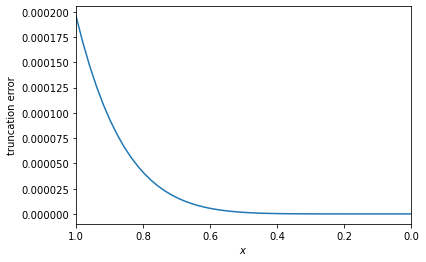

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def truncation_error(x):
    '''
    ------------------------------------------
    Returns the truncarion error obtained when
    comparing the 7th order accurate 
    approximation of the sin x function and 
    the numpy.sin() function 
    ------------------------------------------
    Arguments:
    x : point at which the truncation error is
    calculated
    ------------------------------------------
    '''
    mysin = x - x**3/6 + x**5/120
    return np.abs(np.sin(x) - mysin)

x = np.linspace(0, 1, 50)

plt.figure()
plt.plot(x, truncation_error(x))

plt.xlim(1, 0)
plt.xlabel(r'$x$')
plt.ylabel(r'truncation error')
plt.show()

#### Estimación de la precisión de una serie truncada

Para estimar el orden de precisión de una aproximación truncada de una función, tomaremos un número en el rango $0<x<1$ y se calculará el error de truncamiento. Luego, se reducirá a la mitad el número elegido  y se calculará de nuevo el error de truncamiento. La razón entre los dos errores obtenidos da como resultado un factor de la forma $2^n$, donde $n$ es el orden de precisión de la aproximación. 

In [12]:
# Randomly choosing the number in the range 0<x<1
x = np.random.random()  
# Calculate the truncation errors and their ratio
te_x = truncation_error(x)
te_x2 = truncation_error(x/2)
ratio = te_x/te_x2 

# Results.
print(f'Para x = {x:.3f} el valor del error de truncamiento es : {te_x:.3e}' )
print(f'Para x = {x/2:.3f} el valor del error de truncamiento es : {te_x2:.3e}')
print("")
print(f'La razón de estos valores es {ratio:.3f}')
print(f'que es aproximadamente 2^{np.log2(ratio):.1f}')


Para x = 0.542 el valor del error de truncamiento es : 2.704e-06
Para x = 0.271 el valor del error de truncamiento es : 2.119e-08

La razón de estos valores es 127.610
que es aproximadamente 2^7.0


---
### Estabilidad de un Algoritmo

Un algoritmo, ecuación o problema se denomina **inestable** o **mal-condicionado** si pequeños cambios en los datos de entrada produce grandes cambios en los datos de salida. 

Para ilustrar un algoritmo estable, considere la relación de recurrencia 

$x_0 = 1$\
$x_1 = \frac{1}{3}$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

que es equivalente a 

$x_n = \left( \frac{1}{3} \right)^n$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 18
X = np.zeros(n)
x = np.zeros(n)

X[0] = 1.
X[1] = 1./3.

x[0] = 1.
x[1] = 1./3.

for i in range(2,n):
    X[i] = 13.*X[i-1]/3. - 4.*X[i-2]/3.
    x[i] = (1./3.)**(i)

abs_error = np.abs(X - x)
rel_error = np.abs((X - x)/X)

plt.figure(figsize=(7,5))

plt.plot(range(n), abs_error, label='absolute error')
plt.plot(range(n), rel_error, label='relative error')
plt.xlabel(r'n')
plt.legend()
plt.show()

Hasta el paso $n=15$ en la relación de recurrencia, el error absoluto es prácticamente cero, mientras que el error relativo crece a tan solo $0.05 = 5\%$. Esto muestra que el algoritmo es **estable**.


---
Por otra parte, la relación de recurrencia

$x_0 = 1$\
$x_1 = 4$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

comparada con  

$x_n = 4^n$,

muestra un comportamiento completamente diferente,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 18
X = np.zeros(n)
x = np.zeros(n)

X[0] = 1.
X[1] = 4.

x[0] = 1.
x[1] = 4.

for i in range(2,n):
    X[i] = 13.*X[i-1]/3. - 4.*X[i-2]/3.
    x[i] = (4.)**(i)

abs_error = np.abs(X - x)
rel_error = np.abs((X - x)/X)

plt.figure(figsize=(7,5))

plt.plot(range(n), abs_error, label='absolute error')
plt.plot(range(n), rel_error, label='relative error')
plt.xlabel(r'n')
plt.legend()
plt.show()

Here, up to the step $n=20$ the relative error is very small but the absolute error grows incredible high (up to $1 \times 10^{11}$) !. This algorithm is **unstable**.